<a href="https://colab.research.google.com/github/MOHD-TAUFIQUE/Airbnb-Bookings-Analysis_Capstone-Project/blob/main/Final_Team_Notebook__Airbnb_Bookings_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA_Capstone-project-1 on Airbnb Booking Analysis By Team Alma Phoenix**





##**Team Members:-**
1. **Mohd Taufique**
2. **Pushpam Raghuvanshi**
3. **Aishwary Sharma**
4. **Azhar Ali**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>



# **By Mohd Taufique**
Worked on the following objectives:
1. Most preferred room type ?
2. Hosts with highest listings ?
3. Who are the busiest hosts ?
4. What are the most popular and the expensive area ?


## Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing all the required Libraries

In [ ]:
# importing all the required libraries for data analysis & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading the Data

In [ ]:
#Loading or importing the Dataset into Colab environment by reading csv file
airbnb_df=pd.read_csv("/content/drive/MyDrive/Airbnb Booking Analysis- Mohd Taufique/Copy of Airbnb NYC 2019.csv")


In [ ]:
# making the copy of the airbnb_df so that any change in copied df does not affect the original dataset
airbnb_df_copy=airbnb_df.copy()

## Data Exploration and variable identification

In [ ]:
# Understanding the Data by just printing top 5 rows and taking it's transpose to get clear view in one go.
airbnb_df_copy.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
airbnb_df_copy.info() # Checking the general information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Below are the Description of different attributes present in this dataset.**

1. id : a unique id identifying an airbnb lisitng
2. name : name representating the accomodation
3. host_id : a unique id identifying an airbnb host
4. host_name : name under whom host is registered
5. neighbourhood_group : a group of area
6. neighbourhood : area falls under neighbourhood_group
7. latitude : coordinate of listing
8. longitude : coordinate of listing
9. room_type : type to categorize listing rooms
10. price : price of listing
11. minimum_nights : the minimum nights required to stay in a single visit
12. number_of_reviews : total count of reviews given by visitors
13. last_review : date of last review given
14. reviews_per_month : rate of reviews given per month
15. calculated_host_listings_count : total no of listing registered under the host
16. availability_365 : the number of days for which a host is available in a year.

In [ ]:
num_rows=airbnb_df_copy.shape[0] # provide the number of rows in the dataset
num_col=airbnb_df_copy.shape[1] # provide the number of columns in the dataset.
print(num_rows)
print(num_col)

48895
16


In [ ]:
#checking what are the features/columns present in the dataframe
list(airbnb_df_copy.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
len(airbnb_df_copy['id'].unique()) #sanity check shows here that all the property ids are different

48895

In [ ]:
# Checking the descriptive information about all numerical features
airbnb_df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Here, the minimum price is zero which is anomaly as Airbnb do not provide free stay. We will deal with such rows where minimum price is zero.

In [ ]:
# Number of property/listings which have 0 price listed.
len(airbnb_df_copy[airbnb_df_copy['price']==0])

11

In [ ]:
airbnb_df['host_name'].nunique() #unique hosts

11452

In [ ]:
airbnb_df['name'].nunique() #unique listings


47905

In [ ]:
# Host ids with most listings counts
airbnb_df['host_id'].value_counts()[:5] 


219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

## Data Cleaning

In [ ]:
# Drop  if there is any duplicates.
airbnb_df_copy.drop_duplicates(inplace=True)

In [ ]:
# checking the missing/Null values for each columns in the dataset
airbnb_df_copy.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# The columns like last_review and reviews_per_month have more number of null values and as they are unnecessary columns, just drop them.
airbnb_df_copy=airbnb_df_copy.drop(['last_review','reviews_per_month'], axis=1)

In [ ]:
# Fill the missing values
airbnb_df_copy['name'].fillna('missing', inplace = True)
airbnb_df_copy['host_name'].fillna('missing', inplace=True)
airbnb_df_copy.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

If a person coming to airbnb platform to book a listing/property for stay/rent,he/she will look for the following factors at the time of booking:-
name, host_name, neighbourhood_group, neighbourhood, room_type, price, minimum_nights, number_of_reviews.These are the important variables/features in our analysis and visualization.

## **Data Analysis and Visualization.**

##**First Objective**: Hosts with the highest Listing in the entire neighbourhood group ?

In [ ]:
#Hosts and host listings/property
hosts_listings = airbnb_df_copy.groupby(['host_name'])['calculated_host_listings_count'].max().reset_index()
highest_calculated_host_listings_count = hosts_listings.sort_values(['calculated_host_listings_count'], ascending=False).head(10)
highest_calculated_host_listings_count

,host_name,calculated_host_listings_count
9781,Sonder (NYC),327
1356,Blueground,232
5336,Kara,121
5471,Kazuya,103
9780,Sonder,96
4809,Jeremy & Laura,96
2123,Corporate Housing,91
5524,Ken,87
8395,Pranjal,65
7223,Mike,52


Text(0, 0.5, 'Host listings count')

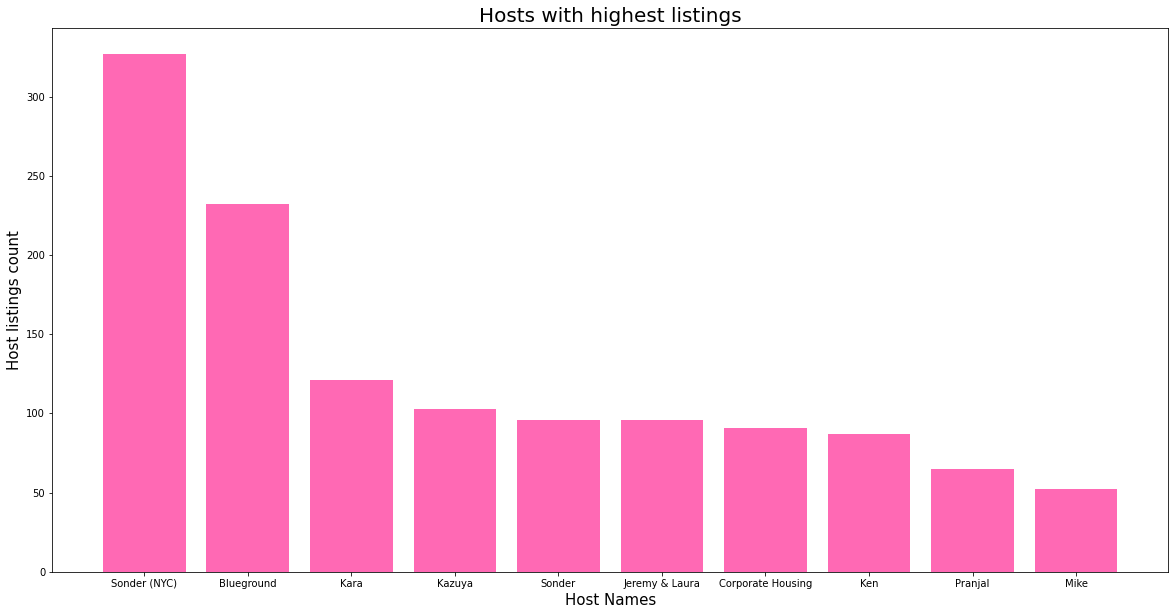

In [ ]:
#Plotting the graph of hosts with highest calculated host listings count
host_name = highest_calculated_host_listings_count['host_name']
calculated_host_listings_count = highest_calculated_host_listings_count['calculated_host_listings_count']
plt.bar(host_name,calculated_host_listings_count,color = "hotpink")

plt.rcParams['figure.figsize'] = (25,15)
plt.title('Hosts with highest listings', {'fontsize':20})
plt.xlabel('Host Names',{'fontsize':15})
plt.ylabel('Host listings count',{'fontsize':15})

**Key understanding**: We know that Bar graph is used for categorical variable. The bar graph above clearly shows that Host with name Sonder(NYC) has highest number of listings in entire Newyork city.

## **Second Objective**: The Most Preferred room types in the entire NYC.

In [ ]:
# Number of Reviews v/s Room_type
room_type_reviews = airbnb_df_copy.groupby('room_type')['number_of_reviews'].count().reset_index()
room_type_reviews

,room_type,number_of_reviews
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


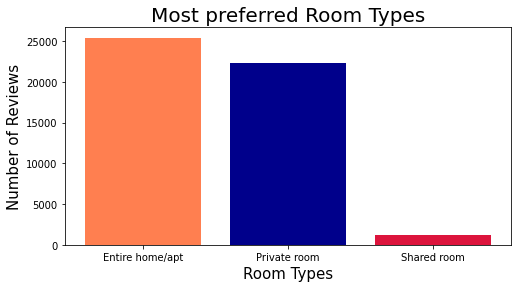

In [ ]:
# Plotting the graph of room_type vs number of Reviews Received.
c=['coral','darkblue','crimson']
plt.bar(room_type_reviews['room_type'],room_type_reviews['number_of_reviews'], color=c)

plt.rcParams['figure.figsize'] = (10,5)
plt.title('Most preferred Room Types', {'fontsize':20})
plt.xlabel('Room Types',{'fontsize':15})
plt.ylabel('Number of Reviews',{'fontsize':15})
plt.show()

**Key takeaway**: Among all the five neighbourhood group in entire NYC the most preferred room_type is Entire home/apt.There can be plenty of reasons like more people prefer privacy, hygiene, space.

## **Third Objective**: Obtain a list of the Busiest Hosts.

In [ ]:
# Now Lets consider the host with most reviews
hosts_reviews = airbnb_df_copy.groupby(['host_id','host_name','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values('number_of_reviews',ascending=False).head(10)
hosts_reviews

,host_id,host_name,room_type,neighbourhood_group,number_of_reviews
24546,47621202,Dona,Private room,Queens,629
7721,4734398,Jj,Private room,Manhattan,607
22268,37312959,Maya,Private room,Queens,543
4602,2369681,Carol,Private room,Manhattan,540
19494,26432133,Danielle,Private room,Queens,510
13741,12949460,Asa,Entire home/apt,Brooklyn,488
1978,792159,Wanda,Private room,Brooklyn,480
5068,2680820,Linda,Private room,Queens,474
161,42273,Dani,Entire home/apt,Brooklyn,467
18335,23591164,Angela,Private room,Queens,466


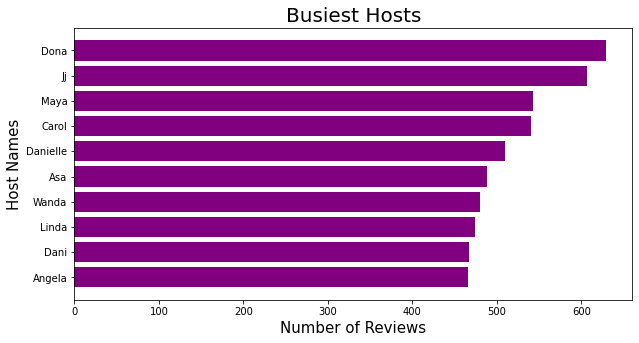

In [ ]:
# Plotting the horizental bar graph for the top 10 busiest hosts in entire NYC
#c=['firebrick', 'green', 'blue', 'black', 'red','purple', 'seagreen', 'skyblue', 'black']
hosts_reviews.sort_values('number_of_reviews',inplace=True)
plt.barh(hosts_reviews['host_name'],hosts_reviews['number_of_reviews'],color='purple')

plt.rcParams['figure.figsize'] = (13,8)
plt.title('Busiest Hosts', {'fontsize':20})
plt.xlabel('Number of Reviews',{'fontsize':15})
plt.ylabel('Host Names',{'fontsize':15})

plt.show()

**Key insight**: The host with name Dona of Queens Neighbourhood group is the most busiest and preferred host with highest number of reviews by guest among all five neighbourhood group. 

## **Fourth Objective**: What price the guest mostly prefer while Booking.

In [ ]:
airbnb_df.loc[airbnb_df['price'] < 100,'price'].count() # taking the total count of listing with price less than 100

21877

In [ ]:
round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean()) # Calculating the mean of all listing whose price is below 100

65

In [ ]:
# Constructing a Function that gives a total new price according to minimum night of stay
def new_price_calculator(min_night):
  '''This function will give the price based on the minimum night a guest is staying'''
  average_price = round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())
  Total_new_price = average_price * min_night

  return Total_new_price

In [ ]:
# Replace the value of price according to minimum night where price = 0$ 
airbnb_df['price'] = np.where(
   (airbnb_df['price'] == 0) ,new_price_calculator(airbnb_df['minimum_nights']) , airbnb_df['price'])

In [ ]:
# Our new statistical summary description of dataset after resolving Zero price anomaly.
airbnb_df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.828367,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.421048,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#  Number of reviews based on price of listings/property
price_reviews = airbnb_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_reviews

,price,number_of_reviews
0,10,93
1,11,113
2,12,8
3,13,9
4,15,19
...,...,...
669,7703,0
670,8000,1
671,8500,2
672,9999,6


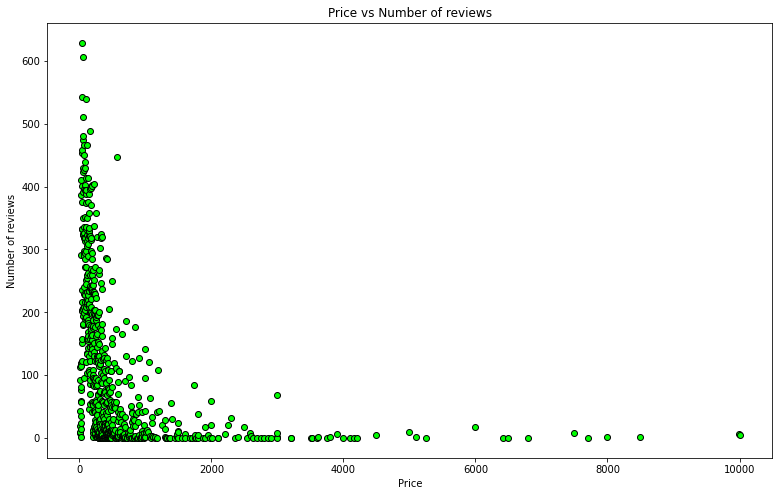

In [ ]:
# Plotting the scatter plot of number of reviews vs Price
plt.scatter(price_reviews['price'],price_reviews['number_of_reviews'], c='lime', edgecolor='black')

plt.rcParams['figure.figsize'] = (8,5) 
plt.title('Price vs Number of reviews')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.show()

**Key Insight**: As we know that Scatter plot shows the relationship between two numerical features. So here it clearly shows that Most number of reviews are received for the listing having low price. It means most guests prefer cheap price.

## **Fifth Objective**: Showing through bar graph the proportion of listing across boroughs and Room_types.

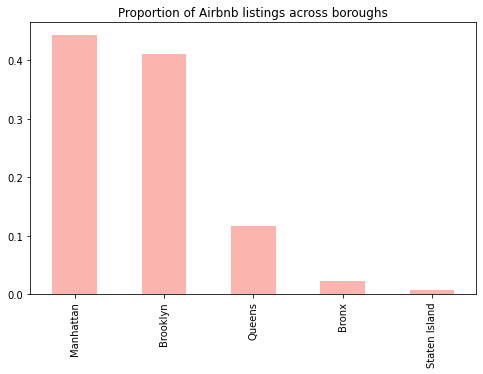

In [ ]:
# obtain a bar chart of the proportion of Airbnb listings in five boroughs/Neighbourhood_group
(airbnb_df_copy.neighbourhood_group.value_counts()/airbnb_df_copy.shape[0]).plot.bar(cmap='Pastel1',title='Proportion of Airbnb listings across boroughs')


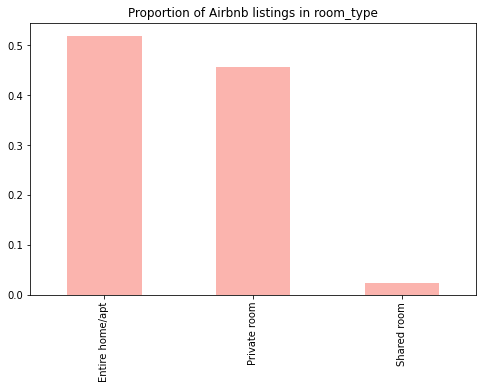

In [ ]:
# obtain a bar chart of the proportion of Airbnb listings in room_type
(airbnb_df_copy.room_type.value_counts()/airbnb_df_copy.shape[0]).plot.bar(cmap='Pastel1',title='Proportion of Airbnb listings in room_type')

## **Sixth Objective**: Where is the most popular and the the most Expensive area ?

In [ ]:
# obtain a dataframe of average availability_365 across five boroughs in room_type
pd.DataFrame(airbnb_df_copy.groupby(['neighbourhood_group','room_type']).mean()['availability_365']).unstack()

availability_365                         
room_type            Entire home/apt Private room Shared room
neighbourhood_group                                          
Bronx                     158.000000   171.331288  154.216667
Brooklyn                   97.205147    99.917983  178.007264
Manhattan                 117.140996   101.845026  138.572917
Queens                    132.267176   149.222716  192.186869
Staten Island             178.073864   226.361702   64.777778

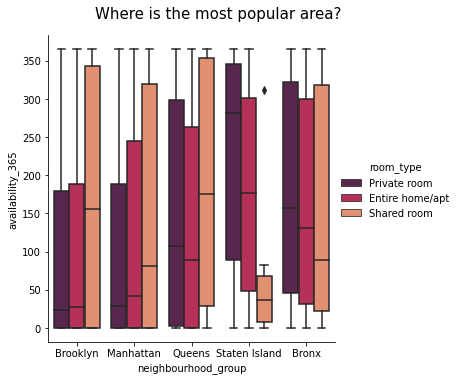

In [ ]:
# Availability according to different room_type in different neighbourhood_group
fig = sns.catplot(x='neighbourhood_group',y='availability_365',kind='box',hue='room_type',data=airbnb_df_copy,palette='rocket')
fig.fig.suptitle('Where is the most popular area?',fontsize=15,y=1.05)
fig.savefig('popular_area.png', bbox_inches = 'tight')

**Insights**: Popularity of a neighbourhood group is inversely proportional to Availability_365. So a smaller availability_365 is ideal for airbnb host. From this Clustered box plot we can see that Brooklyn and manhattan are the most popular borough because they have the least available days. Within these two areas entire home/apt and private room are the most preferred room type whereas staten island is the most popular for Shared room booking.

In [ ]:
# obtain a dataframe of average price across five boroughs in room_type
pd.DataFrame(airbnb_df_copy.groupby(['neighbourhood_group','room_type'])['price'].mean()).unstack()

price                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                    127.506596    66.788344   59.800000
Brooklyn                 178.327545    76.500099   50.527845
Manhattan                249.239109   116.776622   88.977083
Queens                   147.050573    71.762456   69.020202
Staten Island            173.846591    62.292553   57.444444

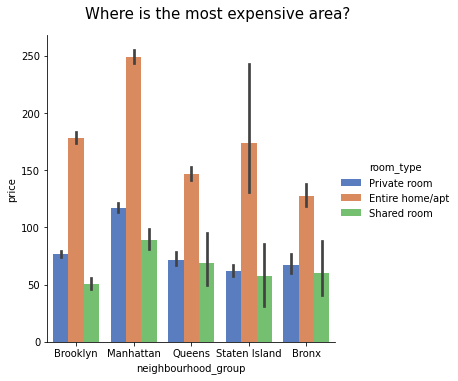

In [ ]:
# Price according to different room_type in different areas
fig2 = sns.catplot(x='neighbourhood_group',y='price',data=airbnb_df_copy,kind='bar',hue='room_type',palette='muted')
fig2.fig.suptitle('Where is the most expensive area?',fontsize=15,y=1.05)
fig2.savefig('price_area.png', bbox_inches = 'tight')

**Key takeaway**: Manhattan among all five neighbourhood group is the most expensive area for booking of all types of room.

# **By Pushpam Raghuvanshi**
Answered following questions.
1. Types of accomodation provided by Top 10 hosts ?
2. Percentage of properties in different neighbourhood_group/Boroughs ?
3. Number of room type in different neighbourhood_group ?

In [ ]:
# Importing Libraries for the analysis of Airbnb data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Using pandas library and read_csv function importing the dataset(here .csv file) from Google drive
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects /Exploratory Data Analysis/Airbnb NYC 2019.csv'
airbnb = pd.read_csv(file_path)

In [ ]:
# Overviewing of data
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Using the shape attribute to check the number of rows and columns in the data. (rows, columns)
airbnb.shape

(48895, 16)

In [ ]:
# Using the columns attribute to identify the different columns of the data.
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Summary of Dataset using the info() funtion.
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Data Cleaning

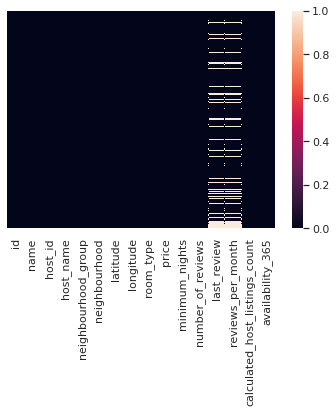

In [ ]:
# Using Heat map datavisualization of null values
sns.heatmap(airbnb.isnull(),yticklabels=False)

In [ ]:
 # Checking for null values and sum for each columns
 airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### As the summary shows, this Airbnb data set is massive with 48895 row entries and 16 columns.  In addition, different columns have different dataytypes. Also, there are significant NaN values in some columns and some columns are not significant for more in-depth analysis so dropping them.

In [ ]:
# Filling null value entries of reviews_per_month column with zero
airbnb['reviews_per_month'].fillna('0', inplace=True)

In [ ]:
# Dropping columns that are not significant for further analysis
airbnb.drop(['id', 'last_review', 'latitude', 'longitude'],axis=1, inplace =True)

In [ ]:
# Examine dataset after dropping above mentioned columns
airbnb.head().T

,0,1,2,3,4
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9
reviews_per_month,0.21,0.38,0,4.64,0.1


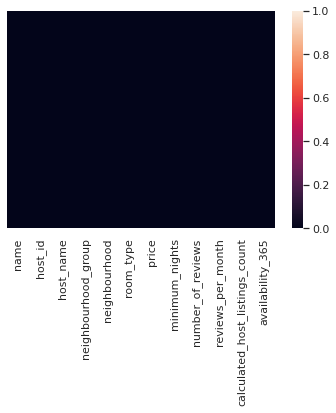

In [ ]:
# Using Heat map datavisualization of null value after removing some columns and filling null values
sns.heatmap(airbnb.isnull(),yticklabels=False)

In [ ]:
# Using describe function checking for satistical summary of columns object.
airbnb.describe(include = 'object').fillna('-').round(2).T

,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
reviews_per_month,48895,938,0,10052


## Types of accommodation provided by Top Hosts.



In [ ]:
# Creating a dataframe for types of accommodation provided by top 10 hosts 
acc = airbnb.groupby(['host_name'])['room_type'].value_counts().sort_values(ascending=False).head(10).unstack()
acc

room_type,Entire home/apt,Private room
host_name,,
Sonder (NYC),319.0,NaN
Michael,251.0,152.0
Blueground,232.0,NaN
David,214.0,184.0
Alex,175.0,NaN
John,135.0,153.0
Mike,141.0,NaN


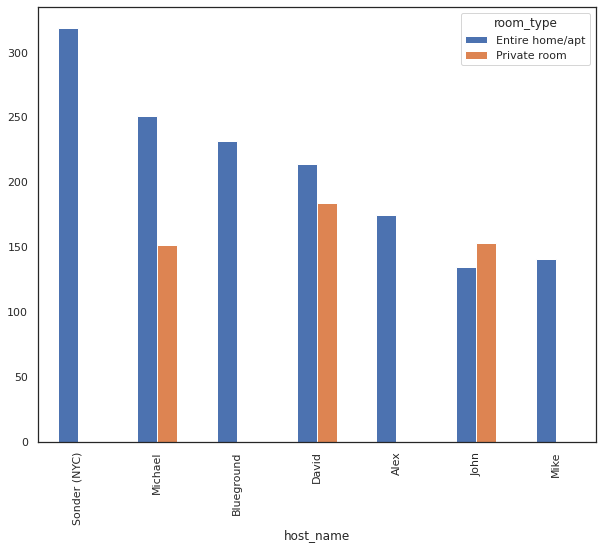

In [ ]:
# Plotting a chart to show types of accommodation provided by top 10 hosts
acc.plot.bar()

**Key Understanding**: Top category hosts mostly provides entire home/apt followed by private room. As guest not prefer shared room, so top hosts don't provide shared room.

## Percentage of Properties in Different Neighbourhood group

In [ ]:
# Assigning a variable to count properties in different neighbourhood
propteries_in_neighbourhoods = airbnb.groupby(['neighbourhood_group'])['host_name'].count()
propteries_in_neighbourhoods

neighbourhood_group
Bronx             1090
Brooklyn         20095
Manhattan        21652
Queens            5664
Staten Island      373
Name: host_name, dtype: int64

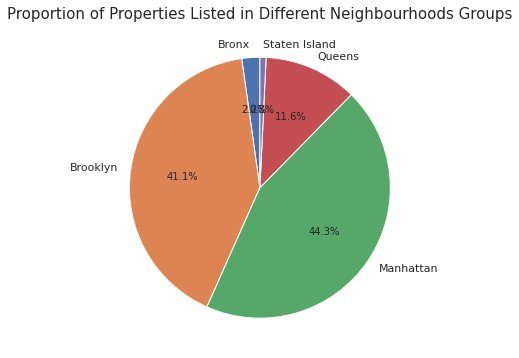

In [ ]:
# Plotting a Pie Chart to show the Proportion of properties listed in different neighboourhood groups
mylabels = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
plt.rcParams['figure.figsize'] = (30, 6)
plt.pie(propteries_in_neighbourhoods, labels = mylabels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Properties Listed in Different Neighbourhoods Groups', fontsize=15)
plt.show()

**Key Observation**: It is clear from the above Pie Chart that MANHATTAN is the city with the highest number of listed properties.  On the other hand, Staten Island has a minimal number of registered properties.

## Number of Room Type in different neighbourhood group/Boroughs

In [ ]:
# Using nunique function counting for different neighbourhood groups
airbnb['neighbourhood_group'].nunique()

5

In [ ]:
# Making a list of different neighbourhood groups
list(airbnb['neighbourhood_group'].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [ ]:
# Creating a dataframe using groupby function to count different room types in different neighbourhood groups
D = airbnb.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()
D

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


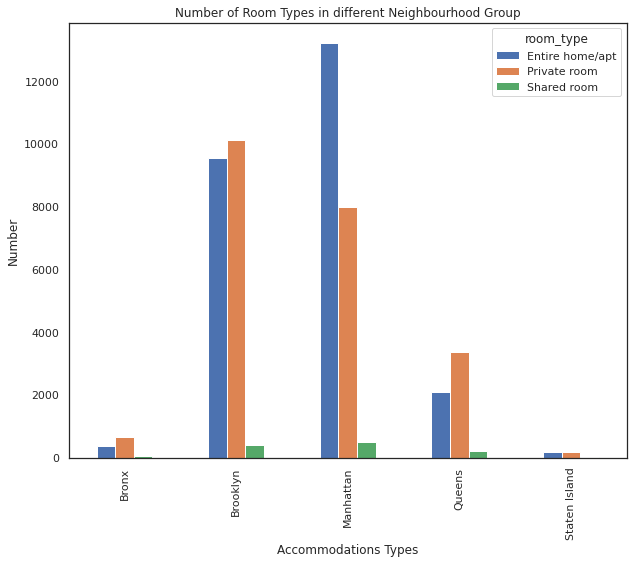

In [ ]:
# Plotting a Bar graph to show number of different types in each neighbourhood group
D.plot.bar()
plt.title('Number of Room Types in different Neighbourhood Group')
plt.ylabel('Number')
plt.xlabel('Accommodations Types')
# Setting the figure size for the plot
plt.rcParams['figure.figsize'] = (10, 6)


**Key Observation**: Manhattan has highest number of Entire home/apt and shared room while Brooklyn has highest number of private room.

In [ ]:
# Creating a dataframe for average price of room types in different  neighbourhood groups
avg_price = airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


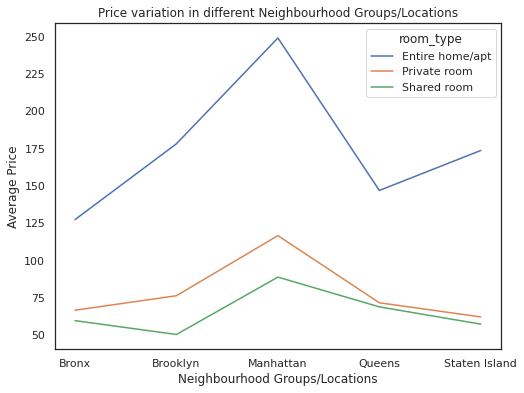

In [ ]:
# Line Graph showing the variation of average price in different neighbourhood locations
avg_price.plot.line()
plt.title('Price variation in different Neighbourhood Groups/Locations')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Groups/Locations')
# Setting the figure size for the plot
plt.rcParams['figure.figsize'] = (10, 20)

# **By Aishwary Sharma**
Discussed following questions.
1. total number of nights spend per room type ?
2. Number of reviews vs neighbourhood group ?
3. Average number of nights spend per beighbourhood_group ?

## First we start with importing all libraries which we need in future use.

In [ ]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Data
airbnb=pd.read_csv('/content/drive/MyDrive/Aishwary-Airbnb Booking Analysis - Capstone project (Almabetter)/Airbnb NYC 2019.csv')

In [ ]:
# Head of Dataframe
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Shape of DataFrame
airbnb.shape

(48895, 16)

## Cleaning the Data

In [ ]:
#Removing the Duplicates if any
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# after removing last_review , reviews_per_month columns
airbnb.drop(['last_review', 'reviews_per_month'], axis = 1,inplace=True)

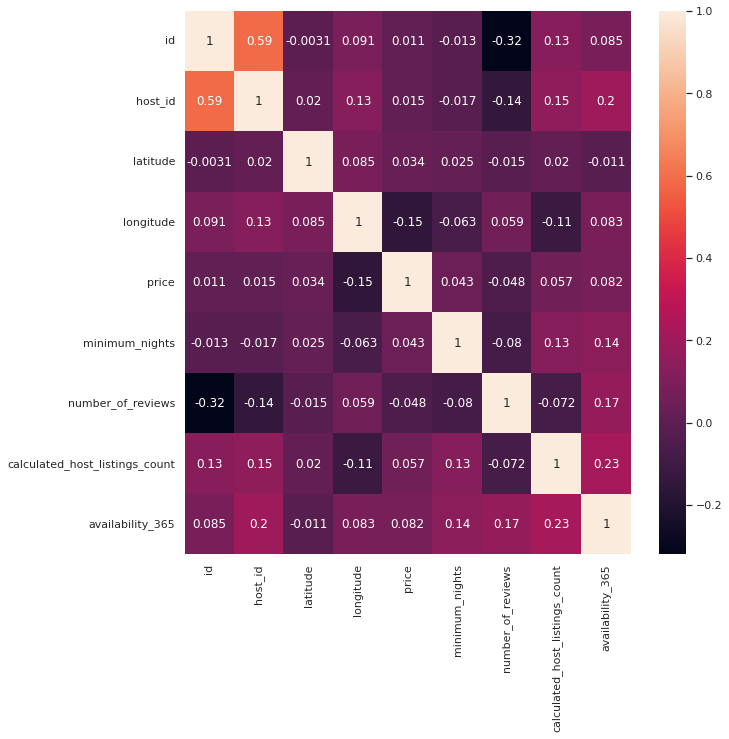

In [ ]:
# Plotting the correlation. matrix
plt.figure(figsize= (10,10))

sns.heatmap(airbnb.corr(), annot = True)
plt.show()

Corealtion shows how two features are associated with each other. If high postive then directly proportional while low negative shows inversely proportional whereas zero shows no association. There is no any strong corelation between any two features/columns in this dataset. The corelation between the same two column is always equal to 1.
 

## Total no. of nights spend per room types

In [ ]:
# find unique value of room types
list(new['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

In [ ]:
#  find the maximum(minimum nights) spending by customer across different room type
total_room=new.groupby(  'room_type')['minimum_nights'].sum().reset_index()
room_types=total_room.sort_values('minimum_nights',ascending=True)
room_types.head()

,room_type,minimum_nights
2,Shared room,7510
1,Private room,120023
0,Entire home/apt,215081


In [ ]:
# create dataset
labels=list(room_types['room_type'])
sizes=list(room_types['minimum_nights'])
# create color parameter
colors=['red','green','blue']
# create explode
explode = (0.07, 0.07, 0.07)

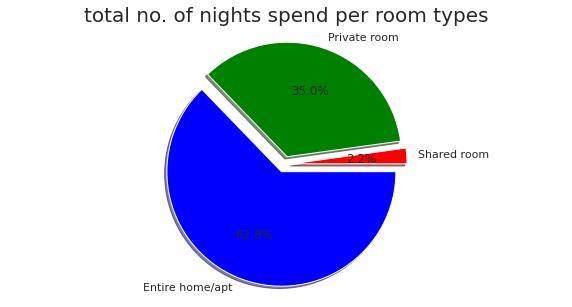

In [ ]:
#creating pie chart
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('total no. of nights spend per room types', fontsize=20)
plt.axis("equal")  
plt.show()

Observation:- Guests mostly prefer to spend nights in entire home/apt followed by private room. Very few of them prefer to spend night in the shared room.

## Number of reviews vs neighbourhood group

In [ ]:
#In this we grouped different neighbour_hood group and the number of reviews
loaction_review_data = airbnb.groupby(['neighbourhood_group'])['number_of_reviews'].max().sort_values(ascending =False).reset_index()
loaction_review_data

,neighbourhood_group,number_of_reviews
0,Queens,629
1,Manhattan,607
2,Brooklyn,488
3,Staten Island,333
4,Bronx,321


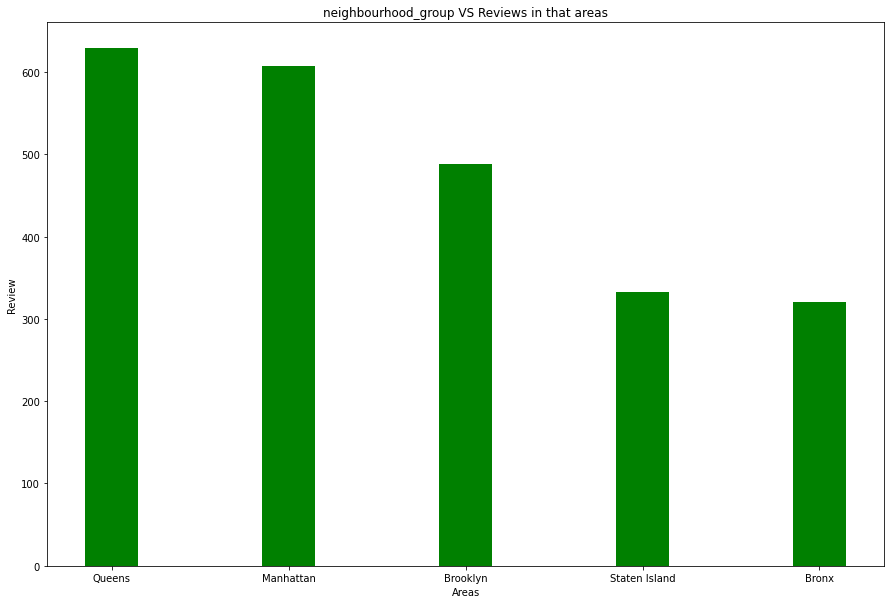

In [ ]:
#Plot Bar chart Of Areas(neighbourhood_group) VS Reviews in that areas
Areas = loaction_review_data['neighbourhood_group']
Reviews = loaction_review_data['number_of_reviews']

chart = plt.figure(figsize = (15,10))
 
# drawing the bar plot
plt.bar(Areas, Reviews, color ='green',
        width = 0.3)
 
plt.xlabel("Areas")
plt.ylabel("Review")
plt.title("neighbourhood_group VS Reviews in that areas")
plt.show()

Observation:- Queens is the neighbourhhod group which has received maximum number of reviews by the guest and Bronx has received least number of reviews.

## Average Night spend across all three room type per neighbourhood group

In [ ]:
#Average Night spend per neighbour
average_night = airbnb.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index()
average_night.rename(columns = {'minimum_nights':'average_night'},inplace=True)
average_night

,neighbourhood_group,average_night
0,Bronx,4.560953
1,Brooklyn,6.056556
2,Manhattan,8.579151
3,Queens,5.181433
4,Staten Island,4.831099


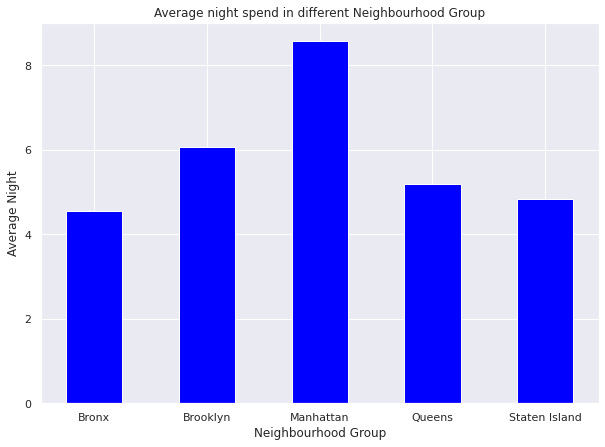

In [ ]:
#Average night spend in different Neighbourhood Group
Avg_night_area = average_night['neighbourhood_group']
Ave_Night = average_night['average_night']

chart = plt.figure(figsize = (10,7))
 
# drawing the bar plot
plt.bar(Avg_night_area,Ave_Night, color ='blue',width = 0.5)
 
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Night")
plt.title("Average night spend in different Neighbourhood Group")
plt.show()

Observation: Average number of nights for all three different room types is maximum for the Manhattan neighbourhood group.

# **By Azhar Ali**
Delivered solution for the following questions.
1. What are the most used keywords in property listings ?
2. what are the top neighbourhood with highest listings ?
3. Density and price distribution across neighbourhood_group/Boroughs ?

##1. Importing libraries and loading the dataset



In [ ]:
# Importing necessary libraries that will be used in the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Mounting google drive to fetch dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# File path of Airbnb dataset in google drive
file_path = ('/content/drive/MyDrive/Airbnb NYC 2019.csv')
airbnb = pd.read_csv(file_path)

##2. Data exploring and cleaning


In [ ]:
# Checking rows and columns
print(f'Number of rows are {airbnb.shape[0]}')
print(f'Number of columsn are {airbnb.shape[1]}')

Number of rows are 48895
Number of columsn are 16


In [ ]:
# Checking first 5 rows of dataset
airbnb.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
# Information abour dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Removing columns 'id', 'latitude', 'host_name', 'longitude' and 'last_review' as they don't contribute much in data exploration

airbnb.drop(['id', 'latitude', 'host_name', 'longitude', 'last_review'], axis=1 ,inplace = True)

In [ ]:
# checking for null values

airbnb.isna().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# reassigning all NaN values in 'reviews_per_month' and 'name' columns with 0
airbnb['reviews_per_month'].fillna(0,inplace=True)
airbnb['name'].fillna(0,inplace=True)

In [ ]:
# Checking for null values again
airbnb.isna().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##3. Top 20 most common words in listing names.




Checking for the most common keywords used by hosts for their listing. We can use these keywords to give customers better suggestions when they are searching for a property.

In [ ]:
# Creating an empty list of strings to store words.
airbnb_words = []

# Extracting words from 'name' columns and appending to the empty list using for loop
for words in airbnb.name:
  airbnb_words.append(words)

# Defining a function to split words string from the list airbnb_words 
def string_split(words):
  '''
  This fuction splits the string
  '''
  word_string = str(words).split()
  return word_string

# An empty list for splited words
words_count = []

# Using defined fuction to apped the lowercase strings in the words_count list
for i in airbnb_words:
  for name in string_split(i):
    name = name.lower()
    words_count.append(name)


In [ ]:
# Importing 'counter' library to count to 20 most common words
from collections import Counter

# counting most common words
counted_words = Counter(words_count).most_common()
counted_words[:30]

[('in', 16733),
 ('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293),
 ('-', 2272),
 ('village', 2055),
 ('heart', 2044),
 ('a', 1909),
 ('large', 1882)]

We got a list but we need to clean these counted words as some words and symbols are irrelevant.

In [ ]:
# Cleaning
words_to_remove = {('a', 1909), ('-', 2272), ('in', 16733), ('the', 3869), ('to', 3827), ('1', 3357), ('with', 3092), ('2', 3079), ('of', 2993), ('and', 2869), ('&', 2820)}

# Using list comprehension 
top_20_temp = [j for j in counted_words if j not in words_to_remove]
top_20 = top_20_temp[:20]
top_20

[('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('east', 2967),
 ('manhattan', 2855),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293),
 ('village', 2055),
 ('heart', 2044),
 ('large', 1882),
 ('loft', 1822)]

In [ ]:
# Converting this list to DataFrame
df_keywords_count = pd.DataFrame(top_20)
df_keywords_count.rename(columns={0: 'Keyword', 1:'Count'}, inplace= True)
df_keywords_count

,Keyword,Count
0,room,9389
1,bedroom,7231
2,private,6985
3,apartment,6113
4,cozy,4634
5,studio,3772
6,brooklyn,3629
7,apt,3571
8,spacious,3387
9,east,2967


## Data Visualization


[Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, 'east'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, 'village'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'large'),
 Text(0, 0, 'loft')]

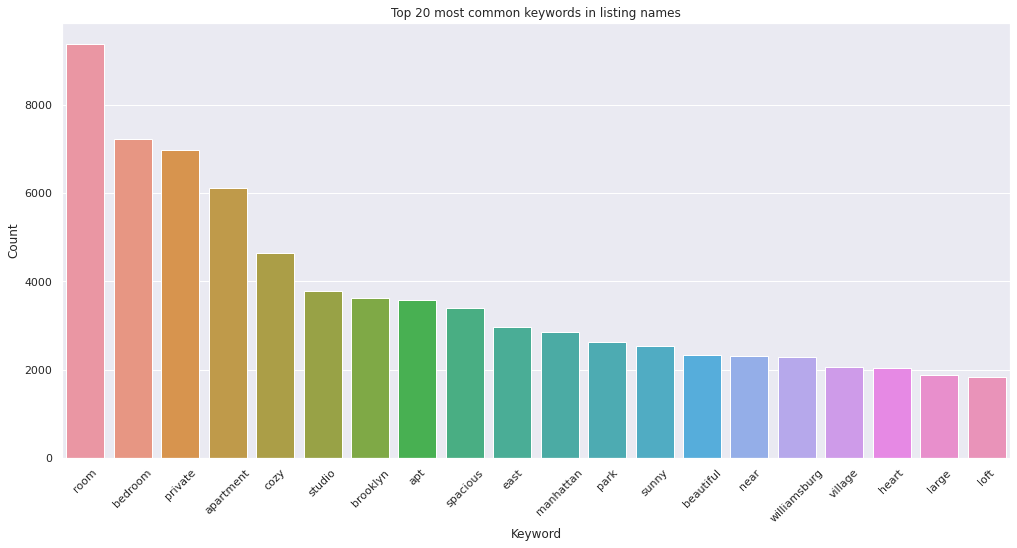

In [ ]:
# Plotting the chart
keyword_chart = sns.barplot(x= 'Keyword', y= 'Count', data = df_keywords_count, )
sns.set_style('white')

# Figure size
sns.set(rc={'figure.figsize' : (17,8)})

# Chart name
keyword_chart.set_title('Top 20 most common keywords in listing names')

# Bar labels adjustment
keyword_chart.set_xticklabels(keyword_chart.get_xticklabels(),rotation = 45)

Here we got the barplot of the most used keywords but for better presentation we will create a wordcloud

In [ ]:
# Importing image and wordcloud
from wordcloud import WordCloud
from PIL import Image

# Creating a string with join method and for loop
text = ' '.join(str(n) for n in df_keywords_count.Keyword)

# Creating an array from the image (Map of NYC with white background) using numpy and creating a mask.
wordcloud_mask = np.array(Image.open('/content/drive/MyDrive/newyorkmap.png'))

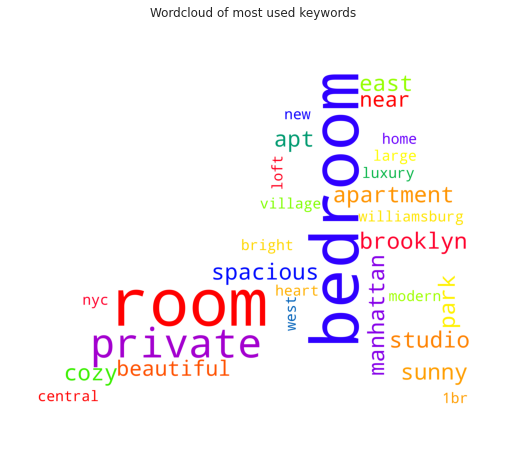

In [ ]:
# Image
cloud = WordCloud(scale=3, colormap='prism' ,background_color='white',collocations=True , mask=wordcloud_mask).generate(text)

# Figure Size and no axis as it is an image
plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')

# Setting title
plt.title('Wordcloud of most used keywords')
plt.show()


We can observe in the image and barplot that keywords like 'room', 'private', and 'studio' are used most number of the times by the hosts. This information can help us to give better suggestions to customers.

Neighbourhood group like Manhattan and Brooklyn are also present in this list among the top 20 keywords, this implies that the number of properties listed in these two neighbourhood groups is more than the other.

##4. Neighbourhoods groups and neighbourhood with highest listing

###4.1 Neighbourhood groups

In [ ]:
# Neighbourhood listing count
neighbourhood_grp_listing = airbnb.neighbourhood_group.value_counts()
neighbourhood_grp_listing

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

###4.2 Visulization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Neighbourhood Group')

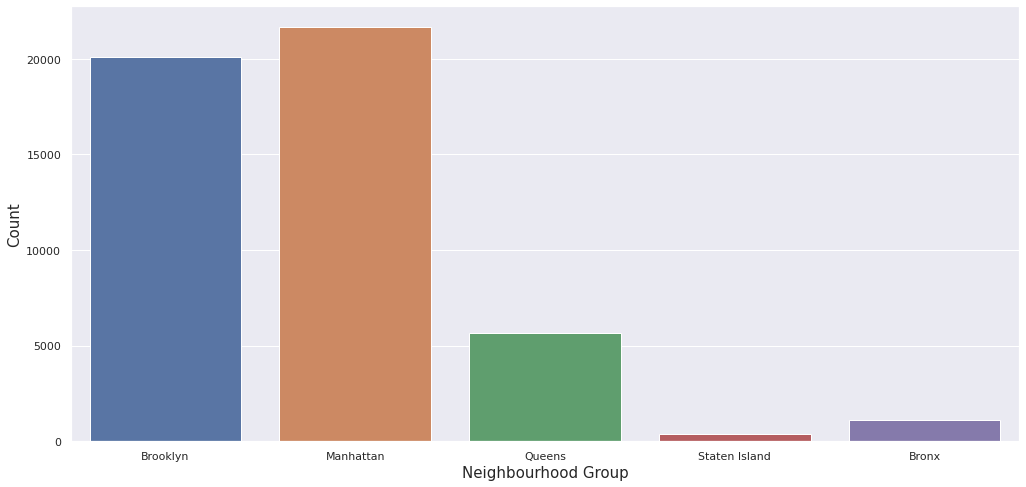

In [ ]:
# Countplot
grp_listing = sns.countplot(airbnb.neighbourhood_group)

# X & Y labels
grp_listing.set_ylabel('Count', size='15')
grp_listing.set_xlabel('Neighbourhood Group', size='15')

We can see that most number of listings are present in Manhattan, followed by Brooklyn, possibly due to high living standard, on the other hand, Staten Island have the lowest number of listings because it is separated from NYC by New York Bay.

In [ ]:
# Counting and sorting values in column 'neighbourhood'
neighbourhoods = airbnb['neighbourhood'].value_counts().sort_values(ascending=False).reset_index()

# Changing column names and selecting top 10 indices
neighbourhoods.rename(columns={'index': 'Neighbourhood','neighbourhood' : 'Listing Count'},inplace= True)
top_neighbourhoods = neighbourhoods[:15]
top_neighbourhoods

,Neighbourhood,Listing Count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


###4.3 Visualization

[Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'Bedford-Stuyvesant'),
 Text(0, 0, 'Harlem'),
 Text(0, 0, 'Bushwick'),
 Text(0, 0, 'Upper West Side'),
 Text(0, 0, "Hell's Kitchen"),
 Text(0, 0, 'East Village'),
 Text(0, 0, 'Upper East Side'),
 Text(0, 0, 'Crown Heights'),
 Text(0, 0, 'Midtown'),
 Text(0, 0, 'East Harlem'),
 Text(0, 0, 'Greenpoint'),
 Text(0, 0, 'Chelsea'),
 Text(0, 0, 'Lower East Side'),
 Text(0, 0, 'Astoria')]

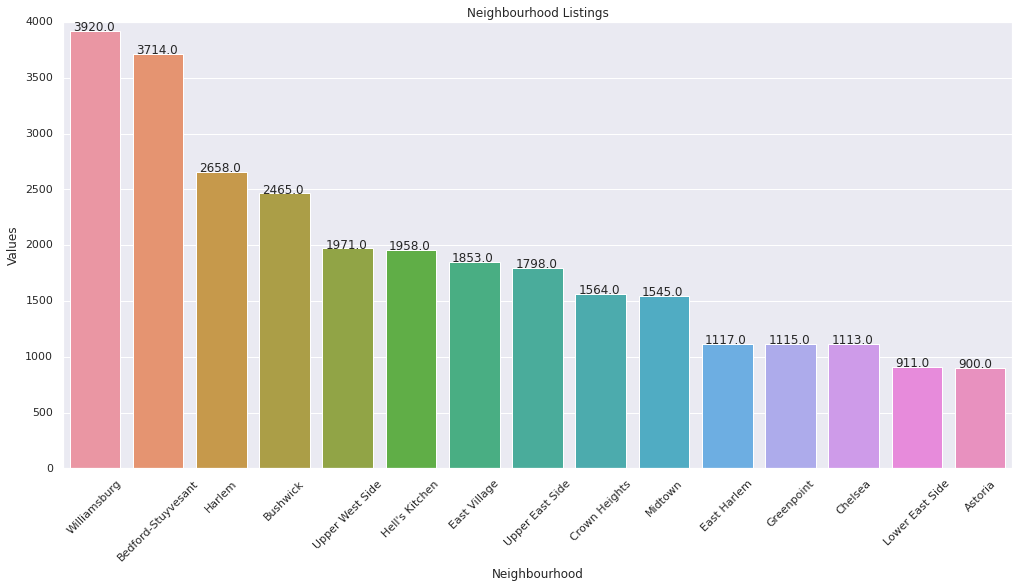

In [ ]:
# Plotting the chart
neighbourhood_chart = sns.barplot(x= 'Neighbourhood', y= 'Listing Count', data = top_neighbourhoods)
sns.set_style('white')

# Figure size
sns.set(rc={'figure.figsize' : (15,6)})
plt.ylabel('Values')

for p in neighbourhood_chart.patches:
  neighbourhood_chart.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01))

# Chart name
neighbourhood_chart.set_title('Neighbourhood Listings')

# Bar labels adjustment
neighbourhood_chart.set_xticklabels(neighbourhood_chart.get_xticklabels(),rotation = 45)

##5. Price distribution across neighbourhood groups


In [ ]:
# List of nerighbourhood groups
neighbourhood_grp_list = list(airbnb['neighbourhood_group'].unique())

# Brooklyn 
neighbour_temp_1 = airbnb[airbnb['neighbourhood_group'] == 'Brooklyn']
price_1 = neighbour_temp_1[['price']]

# Manhattan
neighbour_temp_2 = airbnb[airbnb['neighbourhood_group'] == 'Manhattan']
price_2 = neighbour_temp_2[['price']]

# Queens
neighbour_temp_3 = airbnb[airbnb['neighbourhood_group'] == 'Queens']
price_3 = neighbour_temp_3[['price']]

# Staten Island
neighbour_temp_4 = airbnb[airbnb['neighbourhood_group'] == 'Staten Island']
price_4 = neighbour_temp_4[['price']]

# Bronx
neighbour_temp_5 = airbnb[airbnb['neighbourhood_group'] == 'Bronx']
price_5 = neighbour_temp_5[['price']]

# List of price dataframe
list_of_price_df = [price_1, price_2, price_3, price_4, price_5]

In [ ]:
# Using for loop to get statistical price range distribution and append it to new empty list
price_distri = []

for z in list_of_price_df:
  x= z.describe()
  x= x.iloc[3:].reset_index()
  x.rename(columns={'index': 'Stats'}, inplace= True)
  price_distri.append(x)

# Changing the column names using for loop
for i in list(range(5)):
  price_distri[i].rename(columns={'price': neighbourhood_grp_list[i]}, inplace=True)

# Finalizing the dataframe by changing the index name joining the elements
price_dist_copy = price_distri
price_dist_copy = [j.set_index('Stats') for j in price_dist_copy]
price_dist_copy = price_dist_copy[0].join(price_dist_copy[1:])
price_dist_copy


,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


There are some extreme values as we can see in the statistical table above, therefore we need to ignore the for better data visualization

###5.1 Visualization

Text(0, 0.5, 'Price')

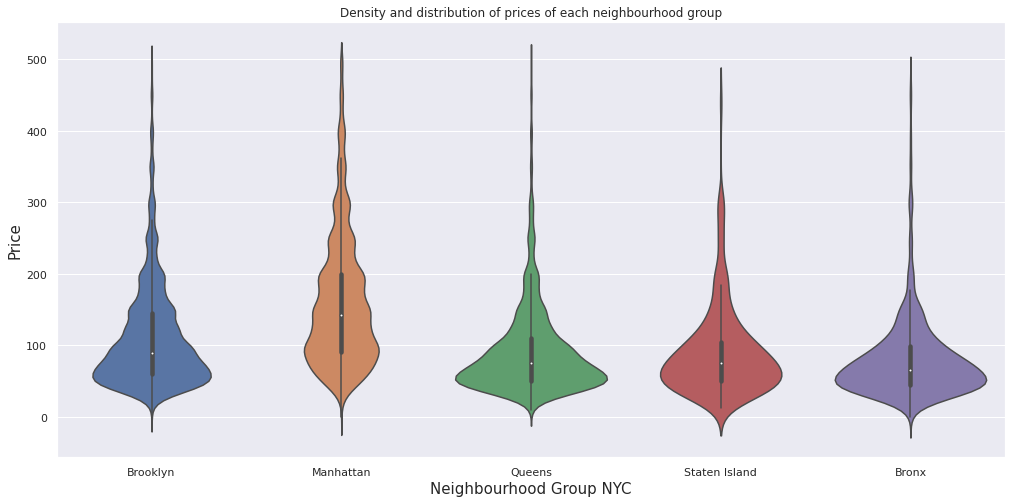

In [ ]:
# Removing extreme values 
final_df = airbnb[airbnb.price < 500]

# Plotting violin plot
price_viz = sns.violinplot(data = final_df , x='neighbourhood_group', y = 'price')

# Setting title
price_viz.set_title('Density and distribution of prices of each neighbourhood group')

# Name X & Y labels
price_viz.set_xlabel('Neighbourhood Group NYC', size= '15')
price_viz.set_ylabel('Price', size='15')

We can observe from the statistical table and the violin plot that Manhattan has the highest price range and distribution than other neighbourhood groups. Also, Manhattan has the highest average price among the group. 

Queens and Bronx have outspread violin plots between \$20 to \$100. This information can be helpful for customers looking for a cheaper stay.

On the other hand, Brooklyn and Staten Island both have a better price distribution than the other two cheap neighbourhoods. It shows that if some customer is looking for a budget stay, Brooklyn and Staten Island are a better option.

# **Conclusions**:

From the entire above analysis we conclude/sum up the following results-
1. Manhattan and Brooklyn are the two most popular, expensive & posh areas of NY city. Average price variation is maximum for Manhattan.These are the most focused place for hosts to do their business.

2. Most visitors don't prefer shared rooms, they tend to visit private room or entire home/apt.
3. Williamsburg is the neighbourhood with highest number of listings in entire NYC. It means this place is famous for tourists attraction.

4. 'room', 'private', and 'studio' are used most number of the times by the hosts. Also Neighbourhood group like Manhattan and Brooklyn are also present in this list among the top 20 keywords.
5. Queens is the neighbourhood which has received maximum number of reviews while bronx has received least number of reviews. 
6. Around 44.3% properties are listed in Manhattan followed by 41.1% in Brooklyn. Staten island has minimum number of listed properties.
7. Percentage of nights spend is maximum for entire home/apt with 62.8% followed by private room with 35%. Average number of nights spend is maximum for Manhattan island which is more than 8 nights and minimum is 4 nights for Bronx.
8. Dona and ji are the most busiest hosts with maximum number of reviews from the visitors/guests.
9. Most guests prefer a cheap price for their stay.
10. Sonder (NYC) has highest number of listings (327) in the entire NYC.Listings by top 10 hosts is almost 2.5% (1270 listings) of whole dataset.

**THANK YOU !!!**